# Import Frameworks

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

from sklearn.model_selection import KFold
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.preprocessing import image
from keras.src.legacy.preprocessing.image import ImageDataGenerator

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from helpers.load_process_data import load_and_prepare_data
from helpers.evalution_report import get_report

# Read data

In [2]:
# Define paths
train_images_path = '../data/train'
test_images_path = '../data/test'
train_labels_path = '../data/labels/train_dataset_labels.csv'
test_labels_path = '../data/labels/test_dataset_labels.csv'

# Load and prepare training data
print("PROCESSING TRAINING DATA")
train_data = load_and_prepare_data(train_images_path, train_labels_path)

# Load and prepare test data
print("PROCESSING TEST DATA")
test_data = load_and_prepare_data(test_images_path, test_labels_path)

# Extract the data
X_train_sklearn = train_data['sklearn']['X']
y_train_sklearn = train_data['sklearn']['y']
X_test_sklearn = test_data['sklearn']['X']
y_test_sklearn = test_data['sklearn']['y']

X_train_tf = train_data['tensorflow']['X']
y_train_tf = train_data['tensorflow']['y']
X_test_tf = test_data['tensorflow']['X']
y_test_tf = test_data['tensorflow']['y']

PROCESSING TRAINING DATA

LOADING DATA FROM: ../data/train

Step 1: Loading images...
   Loaded 16141 images

Step 2: Loading labels...
   Loaded 16141 labels

Step 3: Preparing data for different models...

  Sklearn preparation:
    Data shape: (16141, 6912)
    Labels shape: (16141,)
    Data range: [0.000, 1.000]

  TensorFlow preparation:
    Data shape: (16141, 48, 48, 3)
    Labels shape: (16141,)
    Data range: [0.000, 1.000]
PROCESSING TEST DATA

LOADING DATA FROM: ../data/test

Step 1: Loading images...
   Loaded 4045 images

Step 2: Loading labels...
   Loaded 4045 labels

Step 3: Preparing data for different models...

  Sklearn preparation:
    Data shape: (4045, 6912)
    Labels shape: (4045,)
    Data range: [0.000, 1.000]

  TensorFlow preparation:
    Data shape: (4045, 48, 48, 3)
    Labels shape: (4045,)
    Data range: [0.000, 1.000]


# Models

# Logistic Regression

In [3]:
logistic_reg_model = LogisticRegression(
    max_iter=500, 
    n_jobs= -1, 
    C = 100, 
    penalty = "l2", 
    verbose=2 , 
    warm_start=True)

logistic_reg_model.fit(
    X_train_sklearn,
    y_train_sklearn
    )

get_report(logistic_reg_model,
           X_train_sklearn,
           y_train_sklearn,
           X_test_sklearn,
           y_test_sklearn)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Loss Of Train : 0.51
Loss Of Test : 0.65
Acuuracy Train : 75.49
Acuuracy Test : 68.36
F1 Train : 75.04
F1 Test : 67.64
              precision    recall  f1-score   support

         Sad       0.65      0.61      0.63      1774
       Happy       0.71      0.74      0.72      2271

    accuracy                           0.68      4045
   macro avg       0.68      0.68      0.68      4045
weighted avg       0.68      0.68      0.68      4045



# Simple NN

In [4]:
# Define the neural network model with two hidden layers
FFN_model = MLPClassifier(
    hidden_layer_sizes=(64,32,16,1), 
    activation='identity', 
    solver='adam', 
    max_iter=100,
    n_iter_no_change=5,
    warm_start=True,
    verbose=2)

# Train the model on the training data
FFN_model.fit(X_train_sklearn, y_train_sklearn)

# Evaluate the model on the testing data
score = FFN_model.score(X_train_sklearn, y_train_sklearn)

print("Model score: {:.2f}".format(score))

Iteration 1, loss = 0.78561600
Iteration 2, loss = 0.64622620
Iteration 3, loss = 0.62464539
Iteration 4, loss = 0.62064357
Iteration 5, loss = 0.61098270
Iteration 6, loss = 0.59934271
Iteration 7, loss = 0.60468150
Iteration 8, loss = 0.60090447
Iteration 9, loss = 0.60367815
Iteration 10, loss = 0.62838535
Iteration 11, loss = 0.60048905
Iteration 12, loss = 0.59075547
Iteration 13, loss = 0.59589551
Iteration 14, loss = 0.59192769
Iteration 15, loss = 0.58776447
Iteration 16, loss = 0.58626063
Iteration 17, loss = 0.59125999
Iteration 18, loss = 0.59553721
Iteration 19, loss = 0.59136659
Iteration 20, loss = 0.58407391
Iteration 21, loss = 0.59295337
Iteration 22, loss = 0.57949258
Iteration 23, loss = 0.58682074
Iteration 24, loss = 0.58135452
Iteration 25, loss = 0.58747876
Iteration 26, loss = 0.58646261
Iteration 27, loss = 0.58697043
Iteration 28, loss = 0.58352973
Training loss did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.
Model score: 0.71


In [5]:
get_report(
    FFN_model,
    X_train_sklearn,
    y_train_sklearn,
    X_test_sklearn,
    y_test_sklearn)

Loss Of Train : 0.57
Loss Of Test : 0.57
Acuuracy Train : 71.18
Acuuracy Test : 71.72
F1 Train : 70.84
F1 Test : 71.22
              precision    recall  f1-score   support

         Sad       0.68      0.67      0.67      1774
       Happy       0.74      0.76      0.75      2271

    accuracy                           0.72      4045
   macro avg       0.71      0.71      0.71      4045
weighted avg       0.72      0.72      0.72      4045



# Base CNN model

In [6]:
# Define the model architecture with L2 regularization
model = tf.keras.Sequential([
    
    # First convolutional layer
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output of the convolutional layers
    tf.keras.layers.Flatten(),

    # Dense layer with L2 regularization
    tf.keras.layers.Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.002)),

    # Output layer with one unit (for binary classification)
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

c:\Users\MSI\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       204,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 210,017 (820.38 KB)

 Trainable params: 210,017 (820.38 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    X_train_tf, 
    y_train_tf, 
    epochs=20, 
    batch_size=32, 
    validation_split=0.2)

Epoch 1/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7033 - loss: 0.6616 - val_accuracy: 0.4249 - val_loss: 0.9734
Epoch 2/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7857 - loss: 0.5089 - val_accuracy: 0.4323 - val_loss: 1.1819
Epoch 3/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8042 - loss: 0.4792 - val_accuracy: 0.6225 - val_loss: 0.7785
Epoch 4/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8309 - loss: 0.4254 - val_accuracy: 0.3308 - val_loss: 1.3907
Epoch 5/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8432 - loss: 0.4112 - val_accuracy: 0.7547 - val_loss: 0.5511
Epoch 6/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8474 - loss: 0.4039 - val_accuracy: 0.6764 - val_loss: 0.6957
Epoch 7/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8561 - loss: 0.3832 - val_accuracy: 0.5209 - val_loss: 1.0929
Epoch 8/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8638 - loss: 0.3659 - val_acc

In [8]:
# Evaluate the model on the training set
train_loss, train_acc = model.evaluate(X_train_tf, y_train_tf, verbose=0)
print('Training accuracy: %.3f' % train_acc)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_tf, y_test_tf, verbose=0)
print('Test accuracy: %.3f' % test_acc)

Training accuracy: 0.831
Test accuracy: 0.794


# Adress the overfitting with validation set

In [12]:
# Split the data into training and validation sets
train, val, train_labels, val_labels = train_test_split(X_train_tf, y_train_tf, test_size=0.2, random_state=42)

# Define data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Train the model with data augmentation and early stopping
history = model.fit(datagen.flow(train, train_labels, batch_size=32),
                    epochs=12,
                    validation_data=(val, val_labels),
                    callbacks=[early_stopping])

Epoch 1/12


c:\Users\MSI\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


404/404 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8161 - loss: 0.4440 - val_accuracy: 0.8603 - val_loss: 0.3795
Epoch 2/12
404/404 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8276 - loss: 0.4398 - val_accuracy: 0.8582 - val_loss: 0.3787
Epoch 3/12
404/404 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.8217 - loss: 0.4404 - val_accuracy: 0.8609 - val_loss: 0.3745
Epoch 4/12
404/404 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.8329 - loss: 0.4322 - val_accuracy: 0.8659 - val_loss: 0.3717
Epoch 5/12
404/404 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.8314 - loss: 0.4300 - val_accuracy: 0.8603 - val_loss: 0.3788
Epoch 6/12
404/404 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.8312 - loss: 0.4336 - val_accuracy: 0.8594 - val_loss: 0.3854
Epoch 7/12
404/404 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.8356 - loss: 0.4263 - val_accuracy: 0.8724 - val_loss: 0.3634
Epoch 8/12
404/404 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.8353 - loss: 0.4185 - val_accurac

# 5-fold Cross validation

0it [00:00, ?it/s]

Fold 1/5
Epoch 1/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.8377 - loss: 0.4223 - val_accuracy: 0.8579 - val_loss: 0.3903
Epoch 2/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.8410 - loss: 0.4243 - val_accuracy: 0.8656 - val_loss: 0.3682
Epoch 3/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.8404 - loss: 0.4140 - val_accuracy: 0.8687 - val_loss: 0.3582
Epoch 4/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.8350 - loss: 0.4272 - val_accuracy: 0.8458 - val_loss: 0.3938
Epoch 5/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.8348 - loss: 0.4169 - val_accuracy: 0.8715 - val_loss: 0.3634
Epoch 6/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.8397 - loss: 0.4125 - val_accuracy: 0.8684 - val_loss: 0.3665
Epoch 7/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.8388 - loss: 0.4109 - val_accuracy: 0.8690 - val_loss: 0.3627
Epoch 8/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.8455 - loss: 

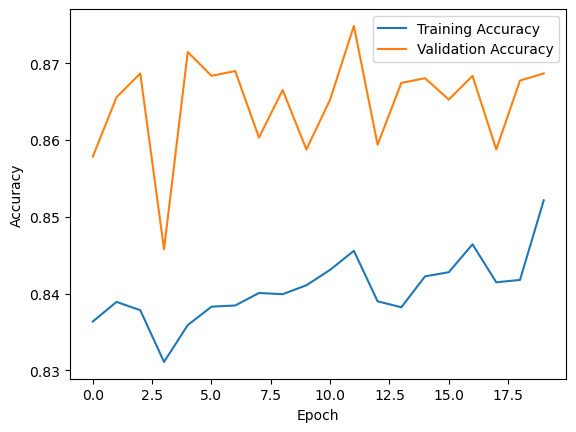

1it [06:33, 393.48s/it]

Fold 2/5
Epoch 1/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.8445 - loss: 0.4059 - val_accuracy: 0.8745 - val_loss: 0.3384
Epoch 2/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.8521 - loss: 0.3915 - val_accuracy: 0.8479 - val_loss: 0.3728
Epoch 3/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.8464 - loss: 0.3984 - val_accuracy: 0.8656 - val_loss: 0.3543
Epoch 4/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.8448 - loss: 0.4009 - val_accuracy: 0.8717 - val_loss: 0.3576
Epoch 5/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.8472 - loss: 0.3957 - val_accuracy: 0.8702 - val_loss: 0.3465
Epoch 6/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.8463 - loss: 0.4035 - val_accuracy: 0.8733 - val_loss: 0.3402
Epoch 7/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.8499 - loss: 0.3908 - val_accuracy: 0.8649 - val_loss: 0.3487
Epoch 8/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 24s 59ms/step - accuracy: 0.8477 - loss: 

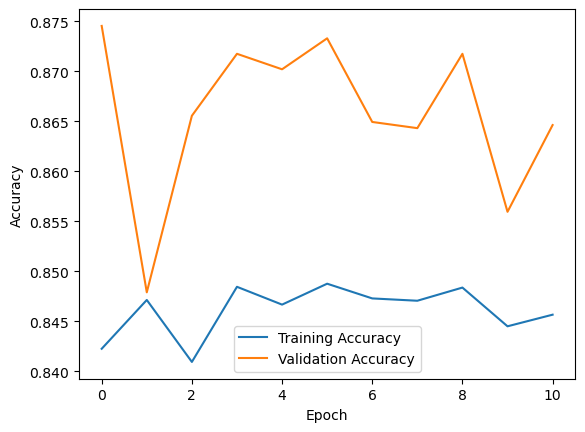

2it [10:02, 284.77s/it]

Fold 3/5
Epoch 1/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.8506 - loss: 0.3877 - val_accuracy: 0.8736 - val_loss: 0.3474
Epoch 2/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.8522 - loss: 0.3861 - val_accuracy: 0.8690 - val_loss: 0.3678
Epoch 3/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.8472 - loss: 0.3908 - val_accuracy: 0.8671 - val_loss: 0.3509
Epoch 4/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 28s 68ms/step - accuracy: 0.8535 - loss: 0.3885 - val_accuracy: 0.8776 - val_loss: 0.3417
Epoch 5/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 28s 68ms/step - accuracy: 0.8531 - loss: 0.3876 - val_accuracy: 0.8733 - val_loss: 0.3652
Epoch 6/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.8485 - loss: 0.3852 - val_accuracy: 0.8600 - val_loss: 0.3698
Epoch 7/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 33s 82ms/step - accuracy: 0.8534 - loss: 0.3866 - val_accuracy: 0.8690 - val_loss: 0.3519
Epoch 8/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.8471 - loss: 

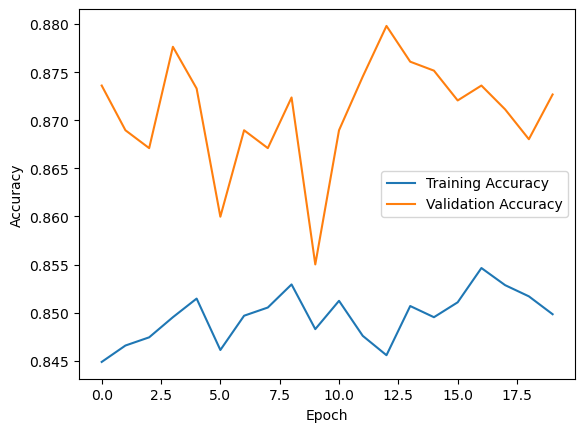

3it [17:49, 368.16s/it]

Fold 4/5
Epoch 1/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.8491 - loss: 0.3875 - val_accuracy: 0.8755 - val_loss: 0.3274
Epoch 2/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.8630 - loss: 0.3744 - val_accuracy: 0.8717 - val_loss: 0.3406
Epoch 3/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.8547 - loss: 0.3860 - val_accuracy: 0.8783 - val_loss: 0.3270
Epoch 4/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.8544 - loss: 0.3842 - val_accuracy: 0.8724 - val_loss: 0.3455
Epoch 5/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.8557 - loss: 0.3724 - val_accuracy: 0.8826 - val_loss: 0.3263
Epoch 6/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.8554 - loss: 0.3872 - val_accuracy: 0.8792 - val_loss: 0.3287
Epoch 7/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 34s 67ms/step - accuracy: 0.8605 - loss: 0.3728 - val_accuracy: 0.8761 - val_loss: 0.3347
Epoch 8/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.8600 - loss: 

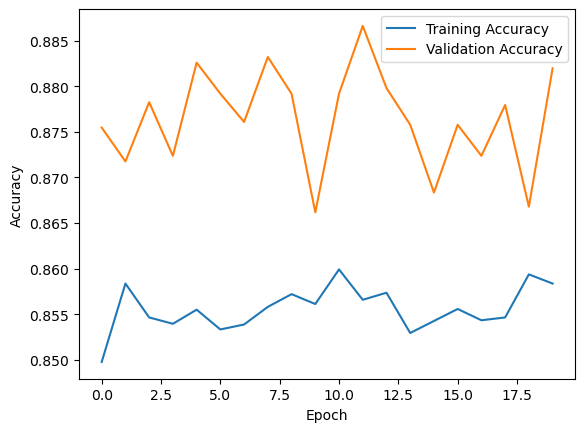

4it [22:53, 342.66s/it]

Fold 5/5
Epoch 1/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.8552 - loss: 0.3744 - val_accuracy: 0.8795 - val_loss: 0.3395
Epoch 2/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.8550 - loss: 0.3755 - val_accuracy: 0.8674 - val_loss: 0.3662
Epoch 3/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.8618 - loss: 0.3604 - val_accuracy: 0.8826 - val_loss: 0.3323
Epoch 4/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.8642 - loss: 0.3637 - val_accuracy: 0.8826 - val_loss: 0.3415
Epoch 5/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.8617 - loss: 0.3633 - val_accuracy: 0.8705 - val_loss: 0.3484
Epoch 6/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.8649 - loss: 0.3621 - val_accuracy: 0.8823 - val_loss: 0.3426
Epoch 7/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.8557 - loss: 0.3721 - val_accuracy: 0.8711 - val_loss: 0.3536
Epoch 8/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.8577 - loss: 

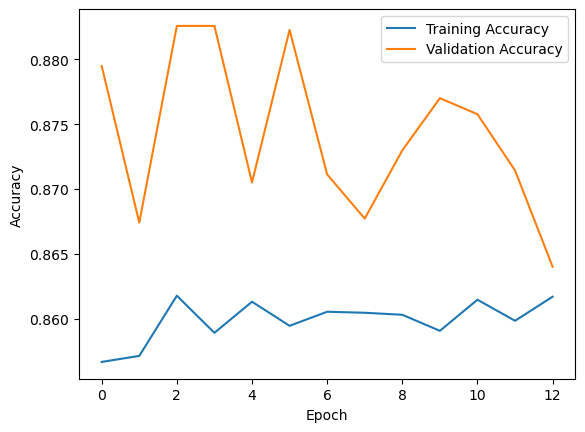

5it [25:38, 307.60s/it]


In [13]:
# Define the number of folds
k = 5

# Split the data into k folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)
train_scores = []
val_scores = []

# Train and validate the model on each fold
for fold, (train_indices, val_indices) in tqdm(enumerate(kf.split(X_train_tf))):

    print(f'Fold {fold+1}/{k}')
    
    train_data, train_labels = X_train_tf[train_indices], y_train_tf[train_indices]
    val_data, val_labels = X_train_tf[val_indices], y_train_tf[val_indices]

    # Train the model with data augmentation and early stopping
    history = model.fit(datagen.flow(train_data, train_labels, batch_size=32),
                    epochs=20,
                    validation_data=(val_data, val_labels),
                    callbacks=[early_stopping])

    # Get the training and validation scores
    train_score = history.history['accuracy']
    val_score = history.history['val_accuracy']


    # Evaluate the model on the training set
    train_loss, train_acc = model.evaluate(train_data, train_labels, verbose=0)
    print('Training accuracy: %.3f' % train_acc)

    # Evaluate the model on the test set
    val_loss, val_acc = model.evaluate(val_data, val_labels, verbose=0)
    print('validation accuracy: %.3f' % val_acc)

    train_scores.append(train_acc)
    val_scores.append(val_acc)

    # Create a line chart of the training and validation accuracy over epochs
    plt.plot(train_score, label='Training Accuracy')
    plt.plot(val_score, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

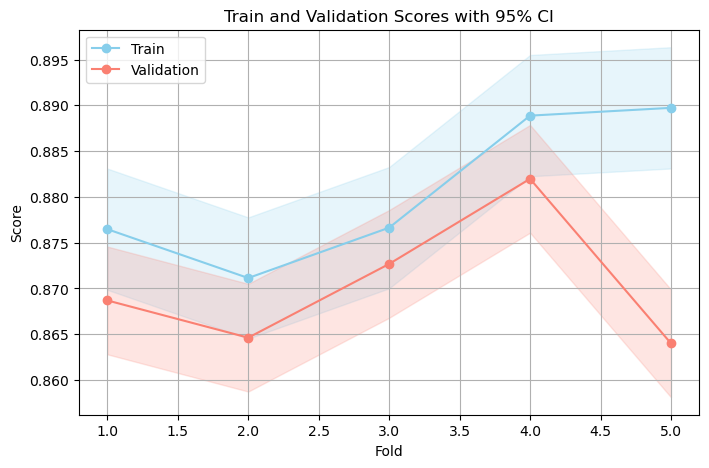

In [25]:
# Compute mean and 95% confidence interval
train_mean = np.mean(train_scores)
train_ci = 2 * np.std(train_scores) / np.sqrt(len(train_scores))

val_mean = np.mean(val_scores)
val_ci = 2 * np.std(val_scores) / np.sqrt(len(val_scores))

x = np.arange(1, len(train_scores) + 1)

plt.figure(figsize=(8,5))

# Train line + shaded CI
plt.plot(x, train_scores, label='Train', color='skyblue', marker='o')
plt.fill_between(x, train_scores - train_ci, train_scores + train_ci, color='skyblue', alpha=0.2)

# Validation line + shaded CI
plt.plot(x, val_scores, label='Validation', color='salmon', marker='o')
plt.fill_between(x, val_scores - val_ci, val_scores + val_ci, color='salmon', alpha=0.2)

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train and Validation Scores with 95% CI')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the test data

In [14]:
# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Define data augmentation for training set
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train the model with data augmentation and early stopping
history = model.fit(datagen.flow(X_train_tf, y_train_tf, batch_size=32),
                    epochs=20,
                    validation_data=(X_test_tf, y_test_tf),
                    callbacks=[early_stopping])

# Get the training and validation scores
train_score = history.history['accuracy']
val_score = history.history['val_accuracy']

Epoch 1/20


c:\Users\MSI\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


505/505 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.8581 - loss: 0.3727 - val_accuracy: 0.8549 - val_loss: 0.3726
Epoch 2/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.8692 - loss: 0.3640 - val_accuracy: 0.8645 - val_loss: 0.3644
Epoch 3/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8615 - loss: 0.3678 - val_accuracy: 0.8692 - val_loss: 0.3717
Epoch 4/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.8595 - loss: 0.3769 - val_accuracy: 0.8675 - val_loss: 0.3642
Epoch 5/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.8578 - loss: 0.3722 - val_accuracy: 0.8685 - val_loss: 0.3615
Epoch 6/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.8593 - loss: 0.3745 - val_accuracy: 0.8677 - val_loss: 0.3672
Epoch 7/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.8609 - loss: 0.3698 - val_accuracy: 0.8663 - val_loss: 0.3780
Epoch 8/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.8663 - loss: 0.3573 - val_accurac

In [15]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_tf, y_test_tf, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 0.3541811406612396
Test accuracy: 0.8734239935874939


In [16]:
train_loss, train_acc = model.evaluate(X_train_tf, y_train_tf, verbose=0)
print('train loss:', train_loss)
print('train accuracy:', train_acc)

train loss: 0.31313997507095337
train accuracy: 0.8866860866546631


# Final model with all the data

In [26]:
# Concatenate train and test data and labels
all_data = np.concatenate((X_train_tf, X_test_tf))
all_labels = np.concatenate((y_train_tf, y_test_tf))

In [27]:
# Train the model with data augmentation and early stopping, without validation data
history = model.fit(datagen.flow(all_data, all_labels, batch_size=32),
                    epochs=20,
                    callbacks=[early_stopping])
# Get the training scores
train_score = history.history['accuracy']
train_score

Epoch 1/20
  1/631 ━━━━━━━━━━━━━━━━━━━━ 1:00 96ms/step - accuracy: 0.9688 - loss: 0.2319

c:\Users\MSI\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


631/631 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.8616 - loss: 0.3652
Epoch 2/20
  5/631 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.8555 - loss: 0.3638

c:\Users\MSI\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


631/631 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.8573 - loss: 0.3699
Epoch 3/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.8575 - loss: 0.3728
Epoch 4/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.8618 - loss: 0.3670
Epoch 5/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.8606 - loss: 0.3699
Epoch 6/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.8662 - loss: 0.3601
Epoch 7/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.8607 - loss: 0.3643
Epoch 8/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.8627 - loss: 0.3680
Epoch 9/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.8600 - loss: 0.3669
Epoch 10/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.8583 - loss: 0.3705
Epoch 11/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.8650 - loss: 0.3617
Epoch 12/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.8661 - loss: 0.3623
Epoch 13/20
631/631 ━━━━━━━━━━━━━━━━━━━━

[0.8594570755958557,
 0.8614881634712219,
 0.8603982925415039,
 0.8617358803749084,
 0.8605964779853821,
 0.8609431982040405,
 0.8606460094451904,
 0.863816499710083,
 0.8593084216117859,
 0.8591598272323608,
 0.8653026819229126,
 0.8639651536941528,
 0.8606460094451904,
 0.8627761602401733,
 0.8614386320114136,
 0.861636757850647,
 0.8607450723648071,
 0.8651540875434875,
 0.8623303174972534,
 0.8612404465675354]

In [30]:
# Save the trained model
model.save('../models/CNN_emotion_detection.keras')